<a href="https://colab.research.google.com/github/Chiranjeevi141004/Python_/blob/main/sales_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Train_Data.csv")

sns.set_style("whitegrid")


In [25]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
100691,FDF57,12.820386,Regular,0.058499,Fruits and Vegetables,168.591857,OUT027,1985,Medium,Tier 3,Supermarket Type3,3409.170702
100692,FDX48,17.792089,Regular,0.038086,Baking Goods,154.329250,OUT018,2009,Medium,Tier 3,Supermarket Type2,3398.368288
100693,NCL31,7.371963,LF,0.120385,Others,145.190862,OUT049,1999,Medium,Tier 1,Supermarket Type1,5297.403989
100694,FDT09,12.827785,Regular,0.021533,Snack Foods,130.945703,OUT019,1985,Small,Tier 1,Grocery Store,131.682185


In [63]:
print(df['Outlet_Type'].unique())


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**Distribution of Item Outlet Sales**

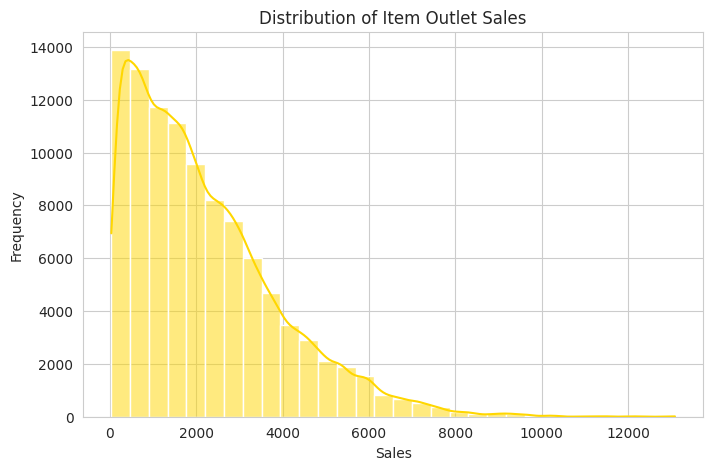

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True, color = 'Gold')
plt.title("Distribution of Item Outlet Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


**Sales by Outlet Type**

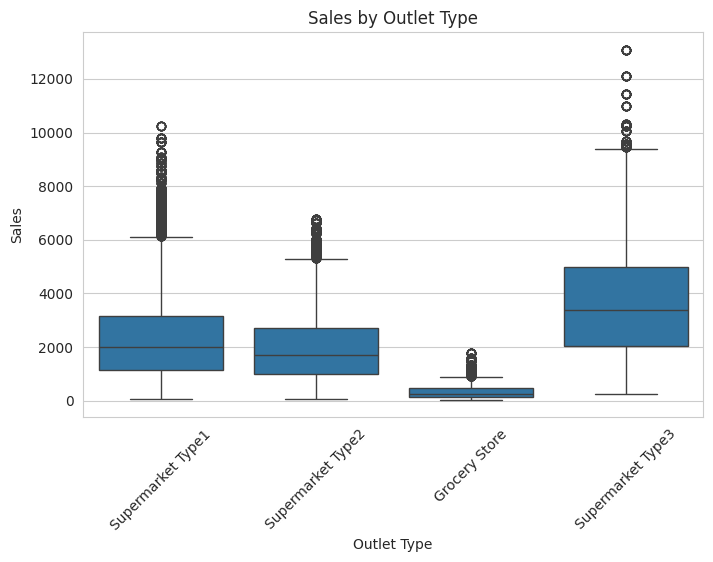

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
plt.title("Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


**Sales by Store Establishment Year**

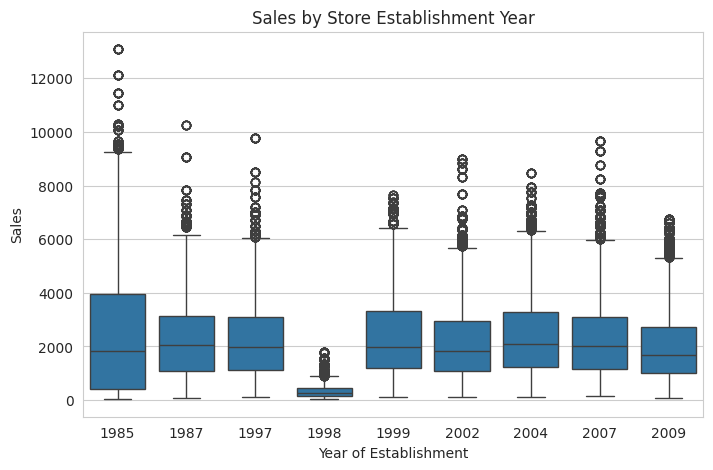

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=df)
plt.title("Sales by Store Establishment Year")
plt.xlabel("Year of Establishment")
plt.ylabel("Sales")
plt.show()


**Sales by Outlet Location Type**

<ipython-input-61-f89f1ab93f1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df, palette="Set2")  # Using a color palette


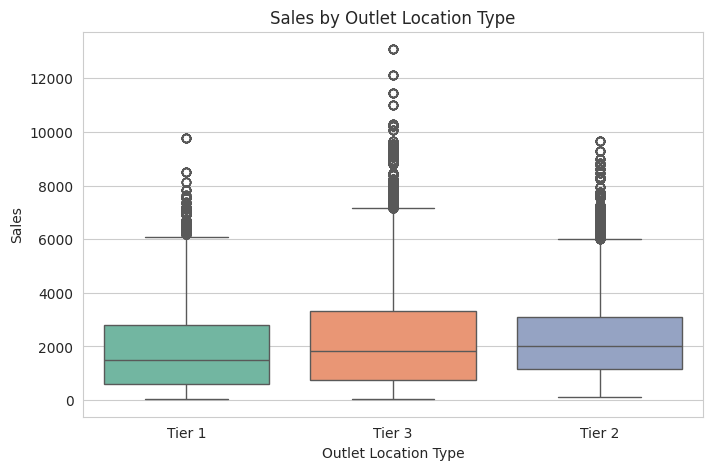

In [61]:
# Plotting Sales by Outlet Location Type with different colors for each tier
plt.figure(figsize=(8,5))
sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df, palette="Set2")  # Using a color palette
plt.title("Sales by Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.show()


**Sales Trend by Product Type & MRP**

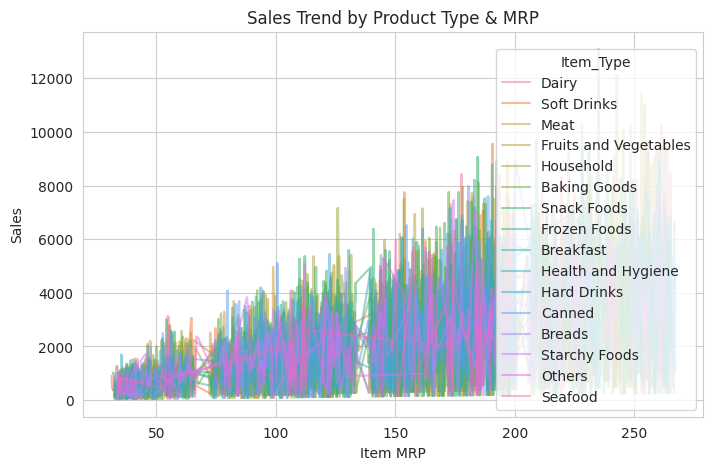

In [30]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type", data=df, alpha=0.5)
plt.title("Sales Trend by Product Type & MRP")
plt.xlabel("Item MRP")
plt.ylabel("Sales")
plt.show()


**Sales Contribution by Product Categories**

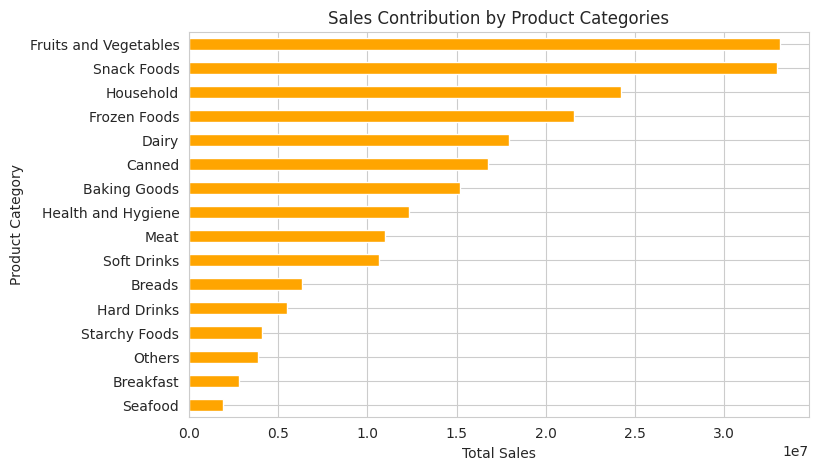

In [38]:
plt.figure(figsize=(8,5))
df.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values().plot(kind="barh",color = 'Orange')
plt.title("Sales Contribution by Product Categories")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()


**Feature Correlation with Sales**

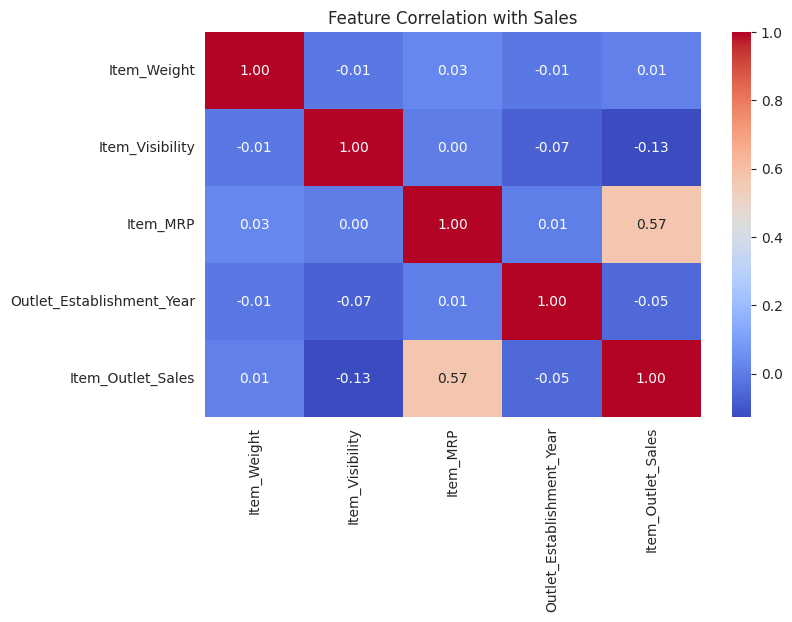

In [37]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Sales")
plt.show()


**Effect of Item Fat Content on Sales**

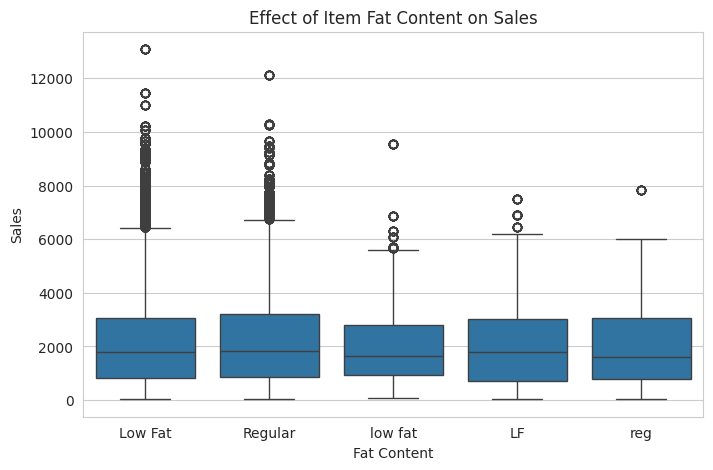

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=df)
plt.title("Effect of Item Fat Content on Sales")
plt.xlabel("Fat Content")
plt.ylabel("Sales")
plt.show()


**Impact of Item Visibility on Sales**

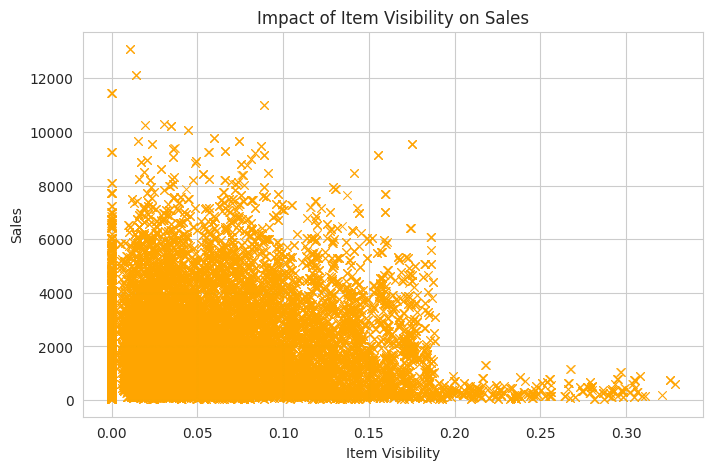

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df, alpha=0.5, color='Orange', marker='x')
plt.title("Impact of Item Visibility on Sales")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

**Item MRP vs Sales**

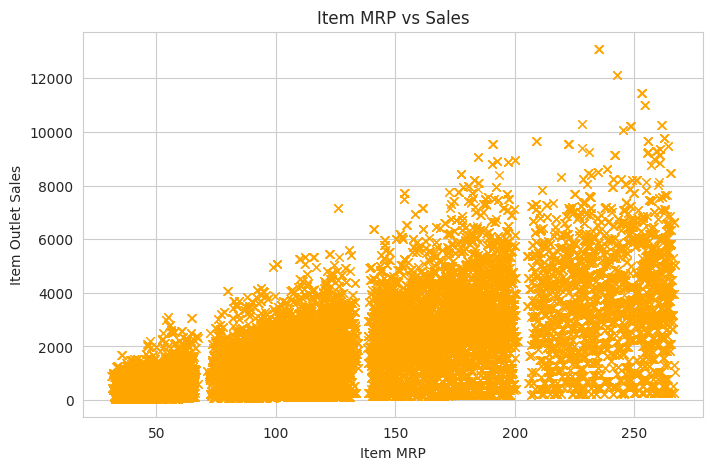

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=df, color="orange",marker = 'x')
plt.title("Item MRP vs Sales")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()


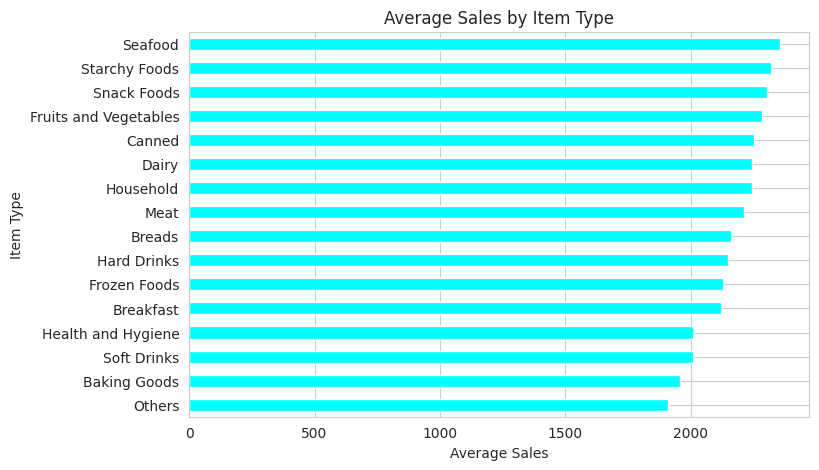

In [56]:
# Plotting average sales by Item Type (horizontal bar plot) with aqua color
plt.figure(figsize=(8,5))
df.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values().plot(kind="barh", color="aqua")
plt.title("Average Sales by Item Type")
plt.xlabel("Average Sales")
plt.ylabel("Item Type")
plt.show()
